<a href="https://colab.research.google.com/github/John260260/Classification_problms_ML/blob/main/IndiaPrimaDiab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importing Lib

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from collections import Counter
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score,recall_score,fbeta_score,precision_recall_curve,balanced_accuracy_score,roc_auc_score,confusion_matrix,plot_confusion_matrix

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/diabetes.csv')

## Data preprocessing

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

## Data visualization and Data processing

In [ ]:
Counter(df['Pregnancies'])

Counter({0: 111,
         1: 135,
         2: 103,
         3: 75,
         4: 68,
         5: 57,
         6: 50,
         7: 45,
         8: 38,
         9: 28,
         10: 24,
         11: 11,
         12: 9,
         13: 10,
         14: 2,
         15: 1,
         17: 1})

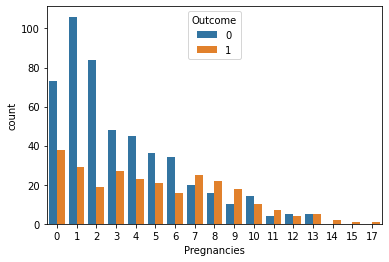

In [ ]:
sns.countplot(df['Pregnancies'],hue=df['Outcome'])

In [ ]:
Counter(df['Outcome'])

Counter({0: 500, 1: 268})

In [ ]:
len(pd.unique(df['Glucose']))

136

In [ ]:
Counter(df['Glucose'])

Counter({0: 5,
         44: 1,
         56: 1,
         57: 2,
         61: 1,
         62: 1,
         65: 1,
         67: 1,
         68: 3,
         71: 4,
         72: 1,
         73: 3,
         74: 4,
         75: 2,
         76: 2,
         77: 2,
         78: 4,
         79: 3,
         80: 6,
         81: 6,
         82: 3,
         83: 6,
         84: 10,
         85: 7,
         86: 3,
         87: 7,
         88: 9,
         89: 6,
         90: 11,
         91: 9,
         92: 9,
         93: 7,
         94: 7,
         95: 13,
         96: 8,
         97: 9,
         98: 3,
         99: 17,
         100: 17,
         101: 9,
         102: 13,
         103: 9,
         104: 6,
         105: 13,
         106: 14,
         107: 11,
         108: 13,
         109: 12,
         110: 6,
         111: 14,
         112: 13,
         113: 5,
         114: 11,
         115: 10,
         116: 7,
         117: 11,
         118: 6,
         119: 11,
         120: 11,
         121: 6,
 

In [ ]:
len(np.unique(df['BloodPressure']))

47

In [ ]:
Counter(df['BloodPressure'])

Counter({0: 35,
         24: 1,
         30: 2,
         38: 1,
         40: 1,
         44: 4,
         46: 2,
         48: 5,
         50: 13,
         52: 11,
         54: 11,
         55: 2,
         56: 12,
         58: 21,
         60: 37,
         61: 1,
         62: 34,
         64: 43,
         65: 7,
         66: 30,
         68: 45,
         70: 57,
         72: 44,
         74: 52,
         75: 8,
         76: 39,
         78: 45,
         80: 40,
         82: 30,
         84: 23,
         85: 6,
         86: 21,
         88: 25,
         90: 22,
         92: 8,
         94: 6,
         95: 1,
         96: 4,
         98: 3,
         100: 3,
         102: 1,
         104: 2,
         106: 3,
         108: 2,
         110: 3,
         114: 1,
         122: 1})

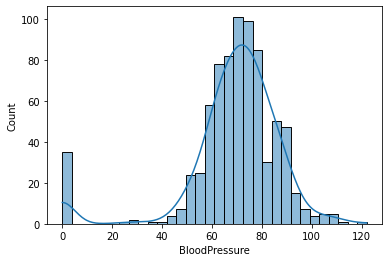

In [ ]:
sns.histplot(df['BloodPressure'],kde=True)

In [ ]:
len(Counter(df['SkinThickness']))

51

In [ ]:
Counter(df['SkinThickness'])

Counter({0: 227,
         7: 2,
         8: 2,
         10: 5,
         11: 6,
         12: 7,
         13: 11,
         14: 6,
         15: 14,
         16: 6,
         17: 14,
         18: 20,
         19: 18,
         20: 13,
         21: 10,
         22: 16,
         23: 22,
         24: 12,
         25: 16,
         26: 16,
         27: 23,
         28: 20,
         29: 17,
         30: 27,
         31: 19,
         32: 31,
         33: 20,
         34: 8,
         35: 15,
         36: 14,
         37: 16,
         38: 7,
         39: 18,
         40: 16,
         41: 15,
         42: 11,
         43: 6,
         44: 5,
         45: 6,
         46: 8,
         47: 4,
         48: 4,
         49: 3,
         50: 3,
         51: 1,
         52: 2,
         54: 2,
         56: 1,
         60: 1,
         63: 1,
         99: 1})

In [ ]:
len(np.unique(df['Insulin']))

186

In [ ]:
np.min(df['Insulin'])

0

In [ ]:
np.max(df['Insulin'])

846

In [ ]:
len(df.loc[df['Insulin']==0])

374

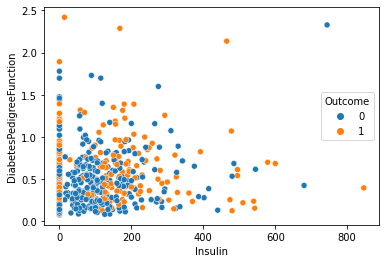

In [ ]:
sns.scatterplot(df['Insulin'],df['DiabetesPedigreeFunction'],hue=df['Outcome'])

In [ ]:
len(Counter(df['BMI']))

248

In [ ]:
np.min(df['BMI'])

0.0

In [ ]:
np.max(df['BMI'])

67.1

In [ ]:
len(df.loc[df['BMI']==0])

11

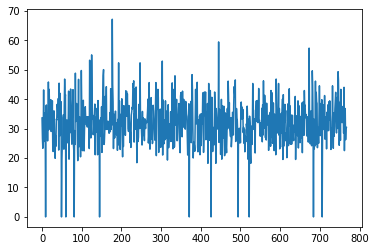

In [ ]:
plt.plot(df['BMI'])

In [ ]:
len(Counter(df['DiabetesPedigreeFunction']))

517

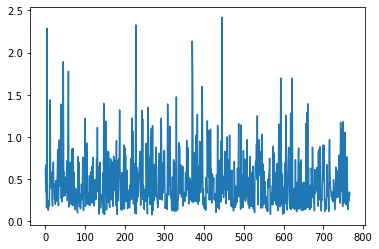

In [ ]:
plt.plot(df['DiabetesPedigreeFunction'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text major ticklabel objects>)

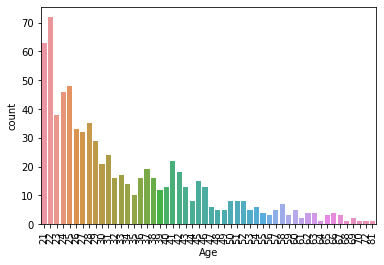

In [ ]:
sns.countplot(df['Age'])
plt.xticks(rotation=90)

In [ ]:
len(df.loc[df['Outcome']==0])

500

In [ ]:
len(df.loc[df['Outcome']==1])

268

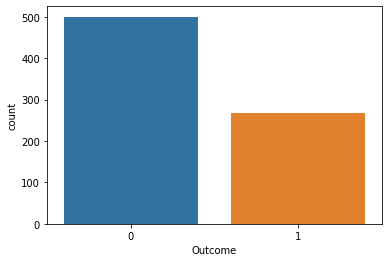

In [ ]:
sns.countplot(df['Outcome'])

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

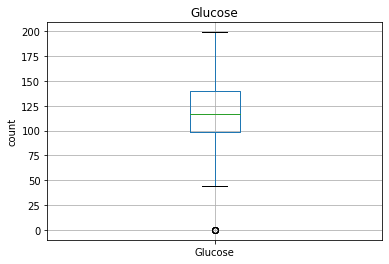

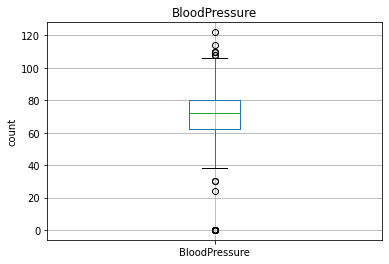

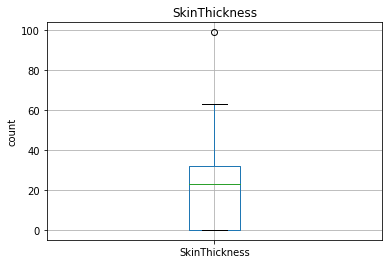

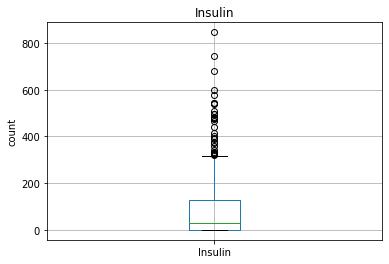

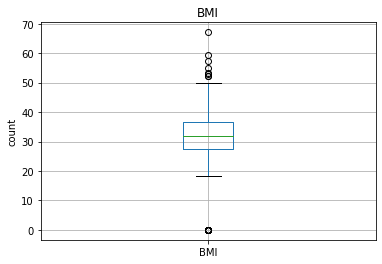

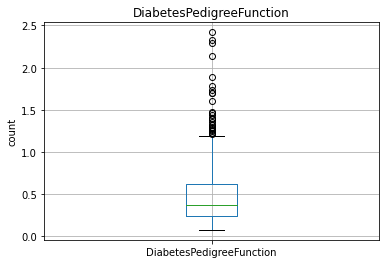

In [ ]:
features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
for feature in features:
  df.boxplot(feature)
  plt.title(feature)
  plt.ylabel('count')
  plt.show()

In [ ]:
duplicates=df.duplicated()

In [ ]:
np.unique(duplicates)

array([False])

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


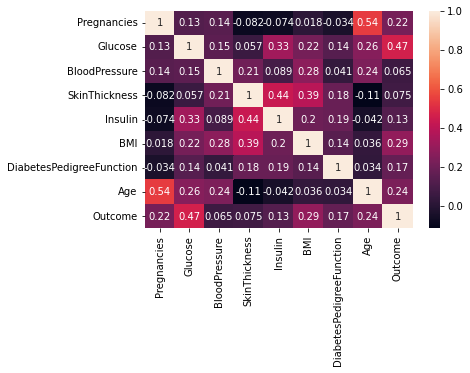

In [ ]:
sns.heatmap(df.corr(),annot=True)

## Data Preparation

In [ ]:
 np.mean(df['Glucose'])

120.89453125

In [ ]:
df.groupby('Outcome')['Glucose'].mean()

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64

In [ ]:
df.groupby('Outcome')['SkinThickness'].mean()

Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64

In [ ]:
df.loc[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [ ]:
df.loc[df['Glucose']==110]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
10,4,110,92,0,0,37.6,0.191,30,0
85,2,110,74,29,125,32.4,0.698,27,0
168,4,110,66,0,0,31.9,0.471,29,0
496,5,110,68,0,0,26.0,0.292,30,0
557,8,110,76,0,0,27.8,0.237,58,0
704,4,110,76,20,100,28.4,0.118,27,0


In [ ]:
df2=df.copy()

In [ ]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
df2[features]=df2[features].replace(0,np.nan)

In [ ]:
df2.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
imputer=KNNImputer(n_neighbors=11,weights='uniform',metric='nan_euclidean')
df3=imputer.fit_transform(df2)

In [ ]:
df3=pd.DataFrame(df3,columns=df2.columns)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [ ]:
df3.iloc[75,1]

104.63636363636364

In [ ]:
df.loc[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [ ]:
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,210.545455,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,62.636364,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,27.909091,210.727273,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
features=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',]
df3[features]=df3[features].round(0)

In [ ]:
integers=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Age','Outcome']
df3[integers]=df3[integers].astype(int)

In [ ]:
df3['Outcome']=df3['Outcome'].astype('category')

In [ ]:
df3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,211,33.6,0.627,50,1
1,1,85,66,29,63,26.6,0.351,31,0
2,8,183,64,28,211,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [ ]:
scale=StandardScaler()

In [ ]:
x_scaled=scale.fit_transform(df3[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']])

In [ ]:
X=pd.DataFrame(x_scaled,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866146,-0.027415,0.637185,0.614004,0.170332,0.468492,1.425995
1,-0.844885,-1.203467,-0.520893,-0.014424,-0.935889,-0.847274,-0.365061,-0.190672
2,1.233880,2.015930,-0.685386,-0.123025,0.614004,-1.327003,0.604397,-0.105584
3,-0.844885,-1.072063,-0.520893,-0.666032,-0.611249,-0.629216,-0.920763,-1.041549
4,-1.141852,0.504785,-2.659297,0.637185,0.163697,1.551370,5.484909,-0.020496


In [ ]:
y=df3['Outcome'].copy()

In [ ]:
X.shape[0]==y.shape[0]

True

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=26,test_size=0.15)

In [ ]:
x_train.shape

(652, 8)

In [ ]:
y_train.shape

(652,)

In [ ]:
#vif score
def vif_score(x):
  vif_data=pd.DataFrame()
  vif_data['Variables']=x.columns
  vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
  return vif_data


print (vif_score(x_train))

                  Variables       VIF
0               Pregnancies  1.467198
1                   Glucose  1.898397
2             BloodPressure  1.280091
3             SkinThickness  1.700874
4                   Insulin  1.913748
5                       BMI  1.803325
6  DiabetesPedigreeFunction  1.038083
7                       Age  1.656370


## Data Modelling

In [ ]:
log_reg= LogisticRegression(random_state=26)

In [ ]:
log_reg.fit(x_train,y_train)

LogisticRegression(random_state=26)

In [ ]:
predictions=log_reg.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        74
           1       0.77      0.64      0.70        42

    accuracy                           0.80       116
   macro avg       0.79      0.77      0.78       116
weighted avg       0.80      0.80      0.80       116



In [ ]:
confusion_matrix(y_test,predictions)

array([[66,  8],
       [15, 27]])

In [ ]:
param_grid=[
            {'C':[0.1,0.01,0.001,0.5,1,10,100,1000],
             'penalty':['l1', 'l2', 'elasticnet', 'none'],
             'class_weight' : ['dict','balanced','none'],
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             }
]

optimal_params= GridSearchCV( LogisticRegression(), param_grid, cv=5, scoring='f1_macro',verbose=0, n_jobs=-1)

optimal_params.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.01, 0.001, 0.5, 1, 10, 100, 1000],
                          'class_weight': ['dict', 'balanced', 'none'],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             scoring='f1_macro')

In [ ]:
print(optimal_params.best_params_)

{'C': 0.5, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
model=LogisticRegression(C=0.5,class_weight='balanced',penalty='l1',solver='saga')
model.fit(x_train,y_train)

LogisticRegression(C=0.5, class_weight='balanced', penalty='l1', solver='saga')

In [ ]:
y_train_predict= model.predict(x_train)
y_test_predict=model.predict(x_test)
print('Train Data')
print(metrics.classification_report(y_train,y_train_predict))
print('Test Data')
print(metrics.classification_report(y_test,y_test_predict))

Train Data
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       426
           1       0.64      0.74      0.68       226

    accuracy                           0.76       652
   macro avg       0.74      0.76      0.75       652
weighted avg       0.78      0.76      0.77       652

Test Data
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        74
           1       0.70      0.79      0.74        42

    accuracy                           0.80       116
   macro avg       0.79      0.80      0.79       116
weighted avg       0.81      0.80      0.80       116



In [ ]:
confusion_matrix(y_test,y_test_predict)

array([[60, 14],
       [ 9, 33]])

In [ ]:
confusion_matrix(y_test,predictions)

array([[66,  8],
       [15, 27]])

In [ ]:
y_train_proba=model.predict_proba(x_train)
y_test_proba=model.predict_proba(x_test)

In [ ]:
def proba_class(y_proba,threshold):
  predicted_class= [1 if a[1]>threshold else 0 for a in y_proba]
  return np.array(predicted_class)

In [ ]:
checking_true=proba_class(y_test_proba,0.5)==y_test_predict

In [ ]:
Counter(checking_true)

Counter({True: 116})

In [ ]:
def classification_metrics(y_actual,y_pred):
  precision=precision_score(y_actual,y_pred)
  recall=recall_score(y_actual,y_pred)
  fb=fbeta_score(y_actual,y_pred,beta=1)
  print('precision:{},recall:{},fb:{}'.format(round(precision,2),round(recall,2),round(fb,2)))

In [ ]:
classification_metrics(y_train,y_train_predict)
classification_metrics(y_test,y_test_predict)

precision:0.64,recall:0.74,fb:0.68
precision:0.7,recall:0.79,fb:0.74


(0.7021276595744681, 0.7857142857142857, 0.7415730337078651)

In [ ]:
for threshold in range(10,100,10):
  trsh=threshold/100
  y_pred_train=proba_class(y_train_proba,trsh)
  print('Threshold:{}'.format(trsh))
  classification_metrics(y_train,y_pred_train)

Threshold:0.1
precision:0.38,recall:1.0,fb:0.55
Threshold:0.2
precision:0.45,recall:0.98,fb:0.62
Threshold:0.3
precision:0.51,recall:0.92,fb:0.66
Threshold:0.4
precision:0.56,recall:0.84,fb:0.67
Threshold:0.5
precision:0.64,recall:0.74,fb:0.68
Threshold:0.6
precision:0.68,recall:0.62,fb:0.65
Threshold:0.7
precision:0.73,recall:0.5,fb:0.6
Threshold:0.8
precision:0.82,recall:0.4,fb:0.54
Threshold:0.9
precision:0.88,recall:0.19,fb:0.32


In [ ]:
def classification_metrics(y_actual,y_pred):
  precision=precision_score(y_actual,y_pred)
  recall=recall_score(y_actual,y_pred)
  fb=fbeta_score(y_actual,y_pred,beta=1)
  print('precision:{},recall:{},fb:{}'.format(round(precision,2),round(recall,2),round(fb,2)))
  return(precision,recall,fb)

In [ ]:
thresholds_curve=[]
prec=[]
recall=[]
fb=[]
for threshold in range(10,100,10):
  trsh=threshold/100
  y_pred_train=proba_class(y_train_proba,trsh)
  print('Threshold:{}'.format(trsh))
  p,r,f=classification_metrics(y_train,y_pred_train)
  thresholds_curve.append(trsh)
  prec.append(p)
  recall.append(r)
  fb.append(f)

Threshold:0.1
precision:0.38,recall:1.0,fb:0.55
Threshold:0.2
precision:0.45,recall:0.98,fb:0.62
Threshold:0.3
precision:0.51,recall:0.92,fb:0.66
Threshold:0.4
precision:0.56,recall:0.84,fb:0.67
Threshold:0.5
precision:0.64,recall:0.74,fb:0.68
Threshold:0.6
precision:0.68,recall:0.62,fb:0.65
Threshold:0.7
precision:0.73,recall:0.5,fb:0.6
Threshold:0.8
precision:0.82,recall:0.4,fb:0.54
Threshold:0.9
precision:0.88,recall:0.19,fb:0.32


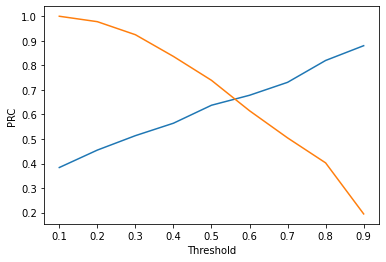

In [ ]:
sns.lineplot(thresholds_curve,prec)
sns.lineplot(thresholds_curve,recall)
plt.xlabel('Threshold')
plt.ylabel('PRC')
plt.show()

In [ ]:
y_pred_test= proba_class(y_test_proba,0.55)
confusion_matrix(y_test,y_pred_test)

array([[63, 11],
       [11, 31]])

In [ ]:
confusion_matrix(y_test,predictions)

array([[66,  8],
       [15, 27]])

In [ ]:
confusion_matrix(y_test,y_test_predict)

array([[60, 14],
       [ 9, 33]])

**Decision Tree**

In [ ]:
clf=DecisionTreeClassifier(random_state=26)
clf.fit(x_train,y_train)
y_train_predict=clf.predict(x_train)
y_test_predict=clf.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       426
           1       1.00      1.00      1.00       226

    accuracy                           1.00       652
   macro avg       1.00      1.00      1.00       652
weighted avg       1.00      1.00      1.00       652

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        74
           1       0.62      0.67      0.64        42

    accuracy                           0.73       116
   macro avg       0.71      0.72      0.71       116
weighted avg       0.74      0.73      0.73       116



In [ ]:
param_grid={
    'max_depth':np.arange(2,10),
    'class_weight':[None,'balanced'],
    'ccp_alpha':[0.1,0.01,0.001,0.0001,1,2,5,10],
    'criterion': ['gini','entropy']
}

In [ ]:
clf=GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=5,scoring='f1_macro',n_jobs=-1)
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001, 0.0001, 1, 2, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='f1_macro')

In [ ]:
print(clf.best_params_)

{'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4}


In [ ]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=26,class_weight='balanced',ccp_alpha=0.01)
clf.fit(x_train,y_train)
y_train_predict=clf.predict(x_train)
y_test_predict=clf.predict(x_test)
print(classification_report(y_train,y_train_predict))
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       426
           1       0.63      0.78      0.70       226

    accuracy                           0.77       652
   macro avg       0.75      0.77      0.76       652
weighted avg       0.79      0.77      0.77       652

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        74
           1       0.71      0.83      0.77        42

    accuracy                           0.82       116
   macro avg       0.80      0.82      0.81       116
weighted avg       0.83      0.82      0.82       116



In [ ]:
confusion_matrix(y_test,y_test_predict)

array([[60, 14],
       [ 7, 35]])

**Random_Forest**

In [ ]:
rndf=RandomForestClassifier(random_state=26)
rndf.fit(x_train,y_train)
y_train_predict=rndf.predict(x_train)
y_test_predict=rndf.predict(x_test)
print(classification_report(y_train,y_train_predict))
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       426
           1       1.00      1.00      1.00       226

    accuracy                           1.00       652
   macro avg       1.00      1.00      1.00       652
weighted avg       1.00      1.00      1.00       652

              precision    recall  f1-score   support

           0       0.85      0.86      0.86        74
           1       0.76      0.74      0.75        42

    accuracy                           0.82       116
   macro avg       0.80      0.80      0.80       116
weighted avg       0.82      0.82      0.82       116



In [ ]:
param_grid={
    'n_estimators':[50,75,100],
    'max_depth':[10,15,25,30],
    'class_weight':[None,'balanced'],
    'ccp_alpha':[0.1,0.05,0.001,0.006,1,5,10],
    'criterion':['gini','entropy']
}

In [ ]:
grid_model=GridSearchCV(RandomForestClassifier(),param_grid=param_grid,scoring='f1_macro',cv=5,verbose=0,n_jobs=-1)
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.05, 0.001, 0.006, 1, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 25, 30],
                         'n_estimators': [50, 75, 100]},
             scoring='f1_macro')

In [ ]:
print(grid_model.best_params_)

{'ccp_alpha': 0.006, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}


In [ ]:
rndf= RandomForestClassifier(ccp_alpha=0.006, class_weight='balanced',n_estimators=50,criterion='entropy', max_depth=10,random_state=26)
rndf.fit(x_train,y_train)
y_train_predict=rndf.predict(x_train)
y_test_predict=rndf.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       426
           1       0.86      0.97      0.91       226

    accuracy                           0.94       652
   macro avg       0.92      0.94      0.93       652
weighted avg       0.94      0.94      0.94       652

              precision    recall  f1-score   support

           0       0.86      0.85      0.86        74
           1       0.74      0.76      0.75        42

    accuracy                           0.82       116
   macro avg       0.80      0.81      0.81       116
weighted avg       0.82      0.82      0.82       116



In [ ]:
confusion_matrix(y_test,y_test_predict)

array([[63, 11],
       [10, 32]])

**XgBoost**

In [ ]:
boost=xgboost.XGBClassifier(random_state=26)
boost.fit(x_train,y_train)
y_train_predict=boost.predict(x_train)
y_test_predict=boost.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       426
           1       0.85      0.80      0.82       226

    accuracy                           0.88       652
   macro avg       0.87      0.86      0.87       652
weighted avg       0.88      0.88      0.88       652

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        74
           1       0.77      0.71      0.74        42

    accuracy                           0.82       116
   macro avg       0.81      0.80      0.80       116
weighted avg       0.82      0.82      0.82       116



In [ ]:
xgb_param_grid={
    'max_depth': [3,5,7,9], #[3,5]
    'learning_rate':[0.05,0.5,0.6,0.06], #[]
    'n_estimators':[10,20,30,40],
    'scale_pos_weight':[1,2,3,5], #adding penalty to smaller class in imbalanced datas #[0.5,1,3,5,]
    'reg_lambda': [1,2,3,5,10]
}


In [ ]:
grid_model= GridSearchCV(boost,param_grid=xgb_param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=26), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.5, 0.6, 0.06],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [10, 20, 30, 40],
                         'reg_lambda': [1, 2, 3, 5, 10],
                         'scale_pos_weight': [1, 2, 3, 5]},
             scoring='f1_macro')

In [ ]:
print(grid_model.best_params_)

{'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 10, 'reg_lambda': 2, 'scale_pos_weight': 1}


In [ ]:
boost=xgboost.XGBClassifier(max_depth=3 ,learning_rate= 0.6, n_estimators=10,scale_pos_weight=1, reg_lambda=2,random_state=26,n_jobs=-1)
boost.fit(x_train,y_train)
y_train_predict=boost.predict(x_train)
y_test_predict=boost.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       426
           1       0.80      0.77      0.78       226

    accuracy                           0.85       652
   macro avg       0.84      0.83      0.84       652
weighted avg       0.85      0.85      0.85       652

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        74
           1       0.79      0.74      0.77        42

    accuracy                           0.84       116
   macro avg       0.83      0.81      0.82       116
weighted avg       0.83      0.84      0.83       116



In [ ]:
confusion_matrix(y_test,y_test_predict)

array([[66,  8],
       [11, 31]])

**Naive_Bayes**

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)
y_train_predict=model.predict(x_train)
y_test_predict=model.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       426
           1       0.65      0.62      0.63       226

    accuracy                           0.75       652
   macro avg       0.73      0.72      0.72       652
weighted avg       0.75      0.75      0.75       652

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        74
           1       0.72      0.69      0.71        42

    accuracy                           0.79       116
   macro avg       0.78      0.77      0.77       116
weighted avg       0.79      0.79      0.79       116



**SVM**

In [ ]:
model_svm=SVC(random_state=26)
model_svm.fit(x_train,y_train)
y_train_predict=model.predict(x_train)
y_test_predict=model.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       426
           1       0.65      0.62      0.63       226

    accuracy                           0.75       652
   macro avg       0.73      0.72      0.72       652
weighted avg       0.75      0.75      0.75       652

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        74
           1       0.72      0.69      0.71        42

    accuracy                           0.79       116
   macro avg       0.78      0.77      0.77       116
weighted avg       0.79      0.79      0.79       116



In [ ]:
param_grid=[
            {'C':[1,10,50,100],
             'gamma':[0.05,1,0.01,0.1,0.5],
             'kernel':['rbf']}
]

optimal_params= GridSearchCV( SVC(), param_grid, cv=5, scoring='f1_macro')

optimal_params.fit(x_train,y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
model_svm=SVC(C=1, gamma=0.01, kernel='rbf',random_state=26)
model_svm.fit(x_train,y_train)
y_train_predict=model.predict(x_train)
y_test_predict=model.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       426
           1       0.65      0.62      0.63       226

    accuracy                           0.75       652
   macro avg       0.73      0.72      0.72       652
weighted avg       0.75      0.75      0.75       652

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        74
           1       0.72      0.69      0.71        42

    accuracy                           0.79       116
   macro avg       0.78      0.77      0.77       116
weighted avg       0.79      0.79      0.79       116



**KNN**

In [ ]:
# instantiate the KNN classifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_train_predict=model.predict(x_train)
y_test_predict=model.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       426
           1       0.75      0.71      0.73       226

    accuracy                           0.82       652
   macro avg       0.80      0.79      0.80       652
weighted avg       0.82      0.82      0.82       652

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        74
           1       0.69      0.52      0.59        42

    accuracy                           0.74       116
   macro avg       0.72      0.69      0.70       116
weighted avg       0.73      0.74      0.73       116



In [ ]:
param_grid = {
    'n_neighbors':[3,5,7,9,15],
    'weights': ['uniform','distance'],
    'metric': ['manhattan','euclidean'],
    #'power':[1,2]

}

knn = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid, cv= 5,scoring='f1_macro',n_jobs = -1)
knn.fit(x_train,y_train)
print(knn.best_params_)

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=9,weights='uniform',metric='manhattan')
knn.fit(x_train,y_train)
y_train_predict = knn.predict(x_train)
y_test_predict = knn.predict(x_test)
print(metrics.classification_report(y_train,y_train_predict))
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       426
           1       0.72      0.66      0.69       226

    accuracy                           0.79       652
   macro avg       0.78      0.76      0.77       652
weighted avg       0.79      0.79      0.79       652

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        74
           1       0.76      0.69      0.72        42

    accuracy                           0.81       116
   macro avg       0.80      0.78      0.79       116
weighted avg       0.81      0.81      0.81       116



In [ ]:
confusion_matrix(y_test,y_test_predict)

array([[65,  9],
       [13, 29]])

**PCA**

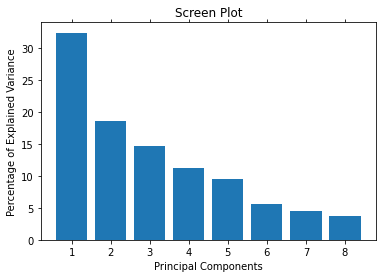

In [ ]:
pca=PCA() #PCA centers the data but does not scale it
X_train_pca=pca.fit_transform(x_train)

per_var=np.round(pca.explained_variance_ratio_*100, decimals=1) #Percentage of variance explained by each of the selected components.
labels=[str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params( axis= 'x',which='both',bottom=True, top=True, labelbottom=True)

plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Screen Plot')
plt.show()

In [ ]:
#lets do PCA

train_pc1_coords=X_train_pca[:,0]
train_pc2_coords=X_train_pca[:,1]

#now centre and scale the PCs
pca_train_scaled=np.column_stack((train_pc1_coords,train_pc2_coords))

xgb_param_grid={
    'max_depth': [3,5,7,9], #[3,5]
    'learning_rate':[0.05,0.5,0.6,0.06], #[]
    'n_estimators':[10,20,30,40],
    'scale_pos_weight':[1,2,3,5], #adding penalty to smaller class in imbalanced datas #[0.5,1,3,5,]
    'reg_lambda': [1,2,3,5,10]
}

optimal_params= GridSearchCV(boost,param_grid=xgb_param_grid,cv=5,scoring='f1_macro',verbose=0)

optimal_params.fit(pca_train_scaled,y_train)
print(optimal_params.best_params_)

{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 30, 'reg_lambda': 10, 'scale_pos_weight': 1}


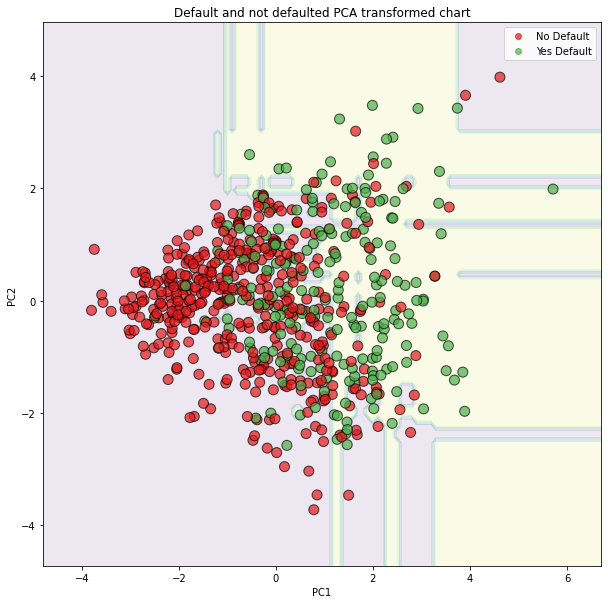

In [ ]:
pca_xgb_model=xgboost.XGBClassifier(learning_rate= 0.5, max_depth= 5,n_estimators= 30, reg_lambda= 10, scale_pos_weight= 1,random_state=26,n_jobs=-1)
pca_xgb_model.fit(pca_train_scaled, y_train)

##Transform test dataset with PCA...
X_test_pca=pca.transform(x_train)
#X_test_pca=pca.transform(X_test_scaled)

test_pc1_coords=X_test_pca[:,0]
test_pc2_coords=X_test_pca[:,1]

##Now create a matrix of points that we can use to show
##decision regions
##the matrix will be a little bit larger than the 
##transformed PCA points so that we can plot all of 
##the PCA points on it without being on the edge
x_min=test_pc1_coords.min()-1
x_max=test_pc1_coords.max()+1

y_min=test_pc2_coords.min()-1
y_max=test_pc2_coords.max()+1

xx,yy= np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                   np.arange(start=y_min,stop=y_max,step=0.1))

##now we will classify every point in that 
##matrix with the SVM. Points on one sie of the 
##calssification boudary will get 0, and points on the other side will get 1.
Z= pca_xgb_model.predict(np.column_stack((xx.ravel(),yy.ravel())))
## right now , Z is just a long array of lots of 0s and 1s which reflect how each point in mesh was classified.
##We use reshape() so that each classification(0or1) corresponds to a specific point in matrix.
Z=Z.reshape(xx.shape)

fig,ax=plt.subplots(figsize=(10,10))
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications.
## The contours will be filled according to the 
## predicted classifications (0s and 1s) in z
ax.contourf (xx,yy,Z,alpha=0.1)

#now create custom colors for the actual data points
cmap=matplotlib.colors.ListedColormap(['#e41a1c','#4daf4a'])
##now draw the actual ata points- these wil
##be colored by their known (not predicted) classifications
##Note: setting alpha=0.7 lets us see if we are covering up a point
##scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test,)
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train, cmap=cmap,s=100,edgecolors='k',alpha=0.7)

##now create legend
legend=ax.legend(scatter.legend_elements()[0], scatter.legend_elements()[1], loc='upper right')

legend.get_texts()[0].set_text('No Default')
legend.get_texts()[1].set_text('Yes Default')

##Now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Default and not defaulted PCA transformed chart')
plt.savefig('svm_default.png')
plt.show()

## **ANN**

In [ ]:
import tensorflow as tf
import operator
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from functools import reduce
from keras.backend import binary_crossentropy

In [ ]:
x=df3.drop('Outcome',axis=1)
y=df['Outcome']

In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,211,33.6,0.627,50
1,1,85,66,29,63,26.6,0.351,31
2,8,183,64,28,211,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,153,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,30,133,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=26)

In [ ]:
model=Sequential()

input_size=len(x.columns)
model.add(Dense(34,activation='sigmoid',input_dim=(input_size)))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50)
print(model.summary)
predictionResults=model.predict(x_test)

Epoch 1/50
21/21 [==============================] - 2s 3ms/step - loss: 5.3467 - accuracy: 0.6534
Epoch 2/50
21/21 [==============================] - 0s 3ms/step - loss: 5.3467 - accuracy: 0.6534
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 5.3467 - accuracy: 0.6534
Epoch 4/50
21/21 [==============================] - 0s 3ms/step - loss: 5.3467 - accuracy: 0.6534
Epoch 5/50
21/21 [==============================] - 0s 3ms/step - loss: 5.3467 - accuracy: 0.6534
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 5.3467 - accuracy: 0.6534
Epoch 7/50
21/21 [==============================] - 0s 4ms/step - loss: 5.3467 - accuracy: 0.6534
Epoch 8/50
21/21 [==============================] - 0s 4ms/step - loss: 5.3467 - accuracy: 0.6534
Epoch 9/50
21/21 [==============================] - 0s 3ms/step - loss: 5.3467 - accuracy: 0.6534
Epoch 10/50
21/21 [==============================] - 0s 3ms/step - loss: 5.3467 - accuracy: 0.6534
Epoch 11/50
21/21 [

In [ ]:
# Predicting on test set
y_pred = predictionResults > 0.50

In [ ]:
# Evaluating using confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[60, 14],
       [13, 29]])